#Movie Recomendation System

Dataset Downloading

In [2]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -q ml-100k.zip

--2025-08-10 00:44:14--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.3’

ml-100k.zip.3       100%[===================>]   4.70M  24.4MB/s    in 0.2s    

2025-08-10 00:44:14 (24.4 MB/s) - ‘ml-100k.zip.3’ saved [4924029/4924029]

replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [3]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Copy dataset to your Drive (into a folder named "ML_Datasets")
# !mkdir -p /content/drive/MyDrive/ML_Datasets/
# !cp -r /content/ml-100k /content/drive/MyDrive/ML_Datasets/

In [4]:
#!pip install numpy==1.24.4 scikit-learn==1.2.2 scipy==1.10.1

Loading Dataset

In [5]:
import pandas as pd

# Loading ratings
ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

# Loading movie info
movies = pd.read_csv("ml-100k/u.item", sep="|", encoding="latin-1", header=None)

# Assigning column names
movie_columns = ["item_id", "title", "release_date", "video_release_date", "IMDb_url",
                 "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
                 "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
                 "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies.columns = movie_columns

In [6]:
print(ratings.head())
print(movies[["item_id", "title"]].head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
   item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


Merging Ratings with Movie Titles

In [7]:
data = pd.merge(ratings, movies[["item_id", "title"]], on="item_id")
print(data.head())

   user_id  item_id  rating  timestamp                       title
0      196      242       3  881250949                Kolya (1996)
1      186      302       3  891717742    L.A. Confidential (1997)
2       22      377       1  878887116         Heavyweights (1994)
3      244       51       2  880606923  Legends of the Fall (1994)
4      166      346       1  886397596         Jackie Brown (1997)


 Creating the User-Movie Matrix

In [8]:
user_movie_matrix = data.pivot_table(index='user_id', columns='title', values='rating')
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


Finding Similarities

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

filled_matrix = user_movie_matrix.fillna(0)

user_similarity = cosine_similarity(filled_matrix)

user_similarity_df = pd.DataFrame(user_similarity,
                                  index=filled_matrix.index,
                                  columns=filled_matrix.index)

user_similarity_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941


## Recommend Movies for a User

In [10]:
def recommend_movies(user_id, num_recommendations=5):
    sim_scores = user_similarity_df[user_id]

    sim_scores = sim_scores.drop(user_id)

    similar_users = sim_scores.sort_values(ascending=False).head(10)

    user_ratings = user_movie_matrix.loc[similar_users.index]
    weighted_ratings = user_ratings.T.dot(similar_users) / similar_users.sum()

    seen_movies = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id].notna()].index
    recommendations = weighted_ratings.drop(seen_movies).sort_values(ascending=False)

    recommendations = weighted_ratings.drop(seen_movies)
    recommendations = recommendations.dropna().sort_values(ascending=False)

    return recommendations.head(num_recommendations)

recommendations = recommend_movies(user_id=5, num_recommendations=5)
print("Recommended Movies for User 5:\n")
print(recommendations)

Recommended Movies for User 5:

title
Terminator, The (1984)    4.292671
Top Gun (1986)            3.194123
dtype: float64


## Visualizing User Similarity with Heatmap

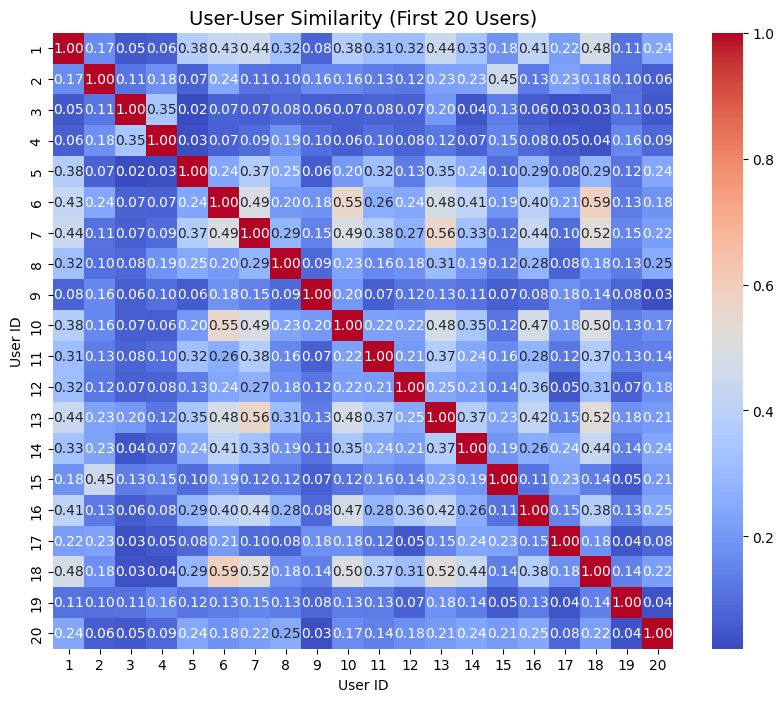

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df.iloc[:20, :20], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("User-User Similarity (First 20 Users)", fontsize=14)
plt.xlabel("User ID")
plt.ylabel("User ID")
plt.show()

## **PHASE 1: MEMORY BASED**

## 1.  **Top Similar Users**

In [12]:
def get_top_similar_users(user_id, top_n=5):
    sim_scores = user_similarity_df[user_id].drop(user_id)

    top_users = sim_scores.sort_values(ascending=False).head(top_n)

    return top_users

print("Top 5 users similar to User 5:\n")
print(get_top_similar_users(5))

Top 5 users similar to User 5:

user_id
307    0.478885
648    0.478407
407    0.469131
497    0.464447
660    0.458032
Name: 5, dtype: float64


## 2. **Item-Based** CF with Cosine Similarity

In [13]:
item_user_matrix = user_movie_matrix.T.fillna(0)

from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=item_user_matrix.index,
                                  columns=item_user_matrix.index)

In [14]:
def recommend_similar_movies(movie_title, num_recommendations=5):
    if movie_title not in item_similarity_df.columns:
        return f"'{movie_title}' not found in dataset."

    sim_scores = item_similarity_df[movie_title].drop(movie_title)

    return sim_scores.sort_values(ascending=False).head(num_recommendations)

print("Movies similar to 'Toy Story (1995)':")
print(recommend_similar_movies("Toy Story (1995)", 5))

Movies similar to 'Toy Story (1995)':
title
Star Wars (1977)                 0.734572
Return of the Jedi (1983)        0.699925
Independence Day (ID4) (1996)    0.689786
Rock, The (1996)                 0.664555
Mission: Impossible (1996)       0.641322
Name: Toy Story (1995), dtype: float64


Recommend Movies for a User (Item-Based)

In [15]:
def item_based_recommendations(user_id, top_n=5, liked_threshold=4):
    liked_movies = user_movie_matrix.loc[user_id]
    liked_movies = liked_movies[liked_movies >= liked_threshold].dropna()

    if liked_movies.empty:
        return []

    similar_movies = pd.Series(dtype='float64')

    for movie in liked_movies.index:
        if movie in item_similarity_df:
            sims = item_similarity_df[movie].drop(movie)
            similar_movies = similar_movies.add(sims, fill_value=0)

    similar_movies = similar_movies.drop(liked_movies.index, errors='ignore')
    recommended = similar_movies.sort_values(ascending=False).head(top_n)

    return recommended

In [16]:
print("Item-based recommendations for User 405:")
print(item_based_recommendations(405))

Item-based recommendations for User 405:
title
Monty Python and the Holy Grail (1974)    52.358550
When Harry Met Sally... (1989)            51.599896
Terminator 2: Judgment Day (1991)         51.078856
Dead Poets Society (1989)                 50.895211
Dances with Wolves (1990)                 50.892058
dtype: float64


## **EVALUATION**

In [17]:
def precision_at_k_item_based(user_id, k=5, relevant_threshold=4):
    recs = item_based_recommendations(user_id, top_n=k)
    if len(recs) == 0:
        return None

    user_rated = user_movie_matrix.loc[user_id]

    relevant = 0
    for title in recs.index:
        if not pd.isna(user_rated[title]) and user_rated[title] >= relevant_threshold:
            relevant += 1

    return relevant / k

In [18]:
def recall_at_k_item_based(user_id, k=5, relevant_threshold=3):
    recs = item_based_recommendations(user_id, top_n=k)
    if len(recs) == 0:
        return None

    user_rated = user_movie_matrix.loc[user_id]
    relevant_items_total = user_rated[user_rated >= relevant_threshold].count()

    if relevant_items_total == 0:
        return None

    relevant_hits = 0
    for title in recs.index:
        if not pd.isna(user_rated[title]) and user_rated[title] >= relevant_threshold:
            relevant_hits += 1

    return relevant_hits / relevant_items_total

In [19]:
def evaluate_precision_multiple_users(user_ids, k=5, relevant_threshold=3):
    precisions = []
    for uid in user_ids:
        p = precision_at_k_item_based(uid, k, relevant_threshold)
        if p is not None:
            precisions.append(p)
    return sum(precisions)/len(precisions) if precisions else 0.0, precisions


def evaluate_recall_multiple_users(user_ids, k=5, relevant_threshold=4):
    recalls = []
    for uid in user_ids:
        r = recall_at_k_item_based(uid, k, relevant_threshold)
        if r is not None:
            recalls.append(r)
    return sum(recalls)/len(recalls) if recalls else 0.0, recalls

In [20]:
user_ids = [405, 655, 13, 450, 276, 537, 416, 303, 234, 393]

avg_p, all_p = evaluate_precision_multiple_users(user_ids, k=5)
avg_r, all_r = evaluate_recall_multiple_users(user_ids, k=5)

print(f"Average Precision@5: {avg_p:.2f}")
print(f"Average Recall@5: {avg_r:.2f}")
print("Individual Precision Scores:", all_p)
print("Individual Recall Scores:", all_r)

Average Precision@5: 0.68
Average Recall@5: 0.00
Individual Precision Scores: [0.2, 1.0, 1.0, 1.0, 0.4, 1.0, 0.4, 0.2, 0.8, 0.8]
Individual Recall Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


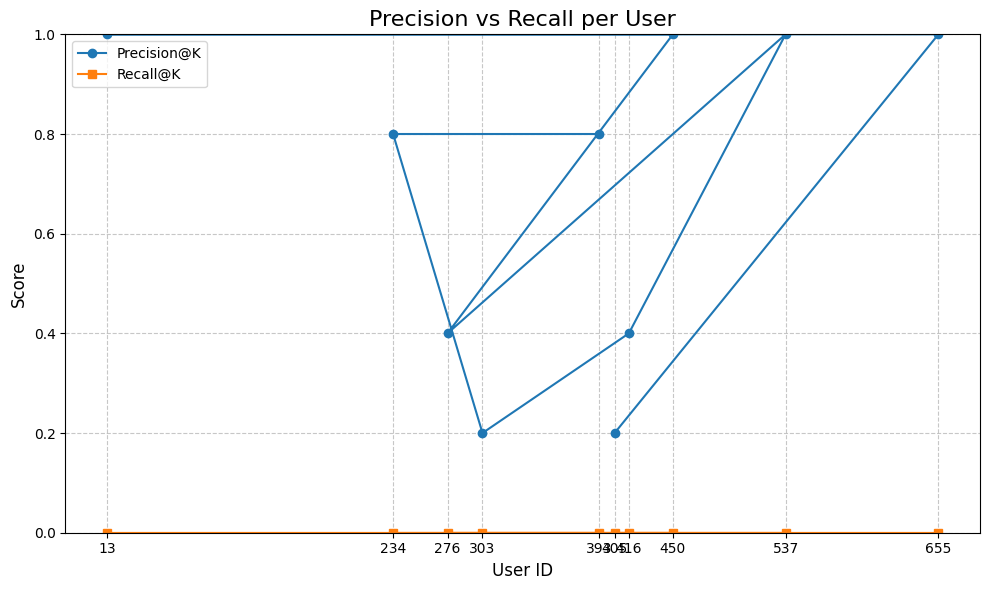

In [21]:
import matplotlib.pyplot as plt

def plot_precision_vs_recall(user_ids, precision_scores, recall_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(user_ids, precision_scores, marker='o', label='Precision@K')
    plt.plot(user_ids, recall_scores, marker='s', label='Recall@K')

    plt.title("Precision vs Recall per User", fontsize=16)
    plt.xlabel("User ID", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.xticks(user_ids)
    plt.ylim(0, 1)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

user_ids = [405, 655, 13, 450, 276, 537, 416, 303, 234, 393]

avg_p, all_p = evaluate_precision_multiple_users(user_ids, k=5)
avg_r, all_r = evaluate_recall_multiple_users(user_ids, k=5)

plot_precision_vs_recall(user_ids, all_p, all_r)

## **PHASE 2: SVD**

In [22]:
#!pip install surprise

In [23]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd

In [24]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'item_id', 'rating']], reader)

# Prepairing
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'item_id', 'rating']], reader)

#Train - Test Split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [25]:
model = SVD()
model.fit(trainset)

predictions = model.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9376


0.9375749454780911

Top-N Recommendations

In [26]:
def get_top_n_recommendations(user_id, n=5):
    # Get all unique item_ids from the dataset
    all_items = ratings['item_id'].unique()

    # Get items the user has already rated
    seen_items = ratings[ratings['user_id'] == user_id]['item_id'].values

    # Filter unseen items
    unseen_items = [item for item in all_items if item not in seen_items]

    # Predict ratings for unseen items
    predictions = [model.predict(user_id, item_id) for item_id in unseen_items]

    # Sort predictions by estimated rating (descending)
    top_n_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    # Map item_ids back to movie titles
    top_n_titles = [(movies[movies['item_id'] == pred.iid]['title'].values[0], pred.est) for pred in top_n_preds]

    return top_n_titles

# Output For Single User
user_id = 405
top_recs = get_top_n_recommendations(user_id, n=5)

print(f"\n|TOP {len(top_recs)} RECOMMENDATION FOR USER *{user_id}* (SVD)| \n\n")
for title, score in top_recs:
    print(f"*{title}* — PREDICTED RATING: {score:.2f}\n")


|TOP 5 RECOMMENDATION FOR USER *405* (SVD)| 


*It's a Wonderful Life (1946)* — PREDICTED RATING: 3.60

*When We Were Kings (1996)* — PREDICTED RATING: 3.48

*Some Folks Call It a Sling Blade (1993)* — PREDICTED RATING: 3.41

*Reservoir Dogs (1992)* — PREDICTED RATING: 3.38

*Kingpin (1996)* — PREDICTED RATING: 3.36



## **Evaluation for SVD**

### Precision@K for SVD

In [27]:
def precision_at_k_svd(user_id, k=5, relevant_threshold=3):
    top_n = get_top_n_recommendations(user_id, n=k)

    # Movies the user has already rated
    user_rated = ratings[ratings['user_id'] == user_id]

    relevant = 0
    for title, _ in top_n:
        # Get the item_id for this title
        item_id = movies[movies['title'] == title]['item_id'].values[0]
        # Check if user rated it highly
        rating_row = user_rated[user_rated['item_id'] == item_id]
        if not rating_row.empty and rating_row['rating'].values[0] >= relevant_threshold:
            relevant += 1

    return relevant / k

### Recall@K for *SVD*

In [28]:
def recall_at_k_svd(user_id, k=5, relevant_threshold=3):
    top_n = get_top_n_recommendations(user_id, n=k)

    # Movies the user has already rated highly
    user_rated = ratings[(ratings['user_id'] == user_id) & (ratings['rating'] >= relevant_threshold)]
    total_relevant = user_rated.shape[0]

    if total_relevant == 0:
        return None

    relevant_hits = 0
    for title, _ in top_n:
        item_id = movies[movies['title'] == title]['item_id'].values[0]
        if item_id in user_rated['item_id'].values:
            relevant_hits += 1

    return relevant_hits / total_relevant

In [29]:
def evaluate_precision_multiple_users_svd(user_ids, k=5):
    precisions = []
    for uid in user_ids:
        p = precision_at_k_svd(uid, k)
        if p is not None:
            precisions.append(p)
    return sum(precisions)/len(precisions), precisions


def evaluate_recall_multiple_users_svd(user_ids, k=5):
    recalls = []
    for uid in user_ids:
        r = recall_at_k_svd(uid, k)
        if r is not None:
            recalls.append(r)
    return sum(recalls)/len(recalls), recalls

#Results
user_ids = [405, 655, 13, 450, 276, 537, 416, 303, 234, 393]

avg_p_svd, all_p_svd = evaluate_precision_multiple_users_svd(user_ids)
avg_r_svd, all_r_svd = evaluate_recall_multiple_users_svd(user_ids)

print(f"📊 SVD — Average Precision@5: {avg_p_svd:.2f}")
print(f"📊 SVD — Average Recall@5: {avg_r_svd:.2f}")

📊 SVD — Average Precision@5: 0.00
📊 SVD — Average Recall@5: 0.00


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict ratings on the test set
predictions = model.test(testset)

# Convert to binary labels: 1 if relevant (rating ≥ 4), else 0
true_labels = [1 if true_r >= 4 else 0 for (_, _, true_r, _, _) in predictions]
predicted_labels = [1 if est >= 4 else 0 for (_, _, _, est, _) in predictions]

In [32]:
# Accuracy
print("Accuracy:", accuracy_score(true_labels, predicted_labels))

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

Accuracy: 0.6135

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.91      0.68      8904
           1       0.84      0.37      0.52     11096

    accuracy                           0.61     20000
   macro avg       0.69      0.64      0.60     20000
weighted avg       0.71      0.61      0.59     20000


Confusion Matrix:
[[8137  767]
 [6963 4133]]


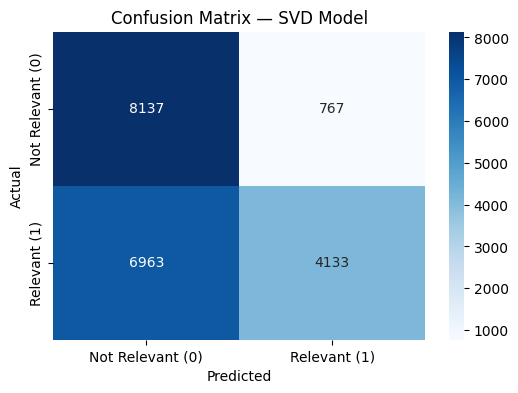

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix again
cm = confusion_matrix(true_labels, predicted_labels)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Relevant (0)', 'Relevant (1)'],
            yticklabels=['Not Relevant (0)', 'Relevant (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix — SVD Model')
plt.show()

In [40]:
from surprise import accuracy

# Test the model
predictions = model.test(testset)

# Calculate and print RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.4f}")

RMSE: 0.9376
RMSE: 0.9376


In [41]:
import gradio as gr

# Function to get top N recommendations from a Surprise model
def get_top_n(model, trainset, user_id, n=5):
    inner_id = trainset.to_inner_uid(str(user_id))
    all_items = trainset.all_items()
    predictions = []
    for iid in all_items:
        if not trainset.knows_item(iid):  # safety check
            continue
        est = model.predict(str(user_id), trainset.to_raw_iid(iid)).est
        predictions.append((trainset.to_raw_iid(iid), est))
    predictions.sort(key=lambda x: x[1], reverse=True)
    return [iid for iid, _ in predictions[:n]]

# Gradio interface function
def recommend(user_id):
    try:
        item_recs = get_top_n(item_model, trainset, user_id)
        svd_recs = get_top_n(svd_model, trainset, user_id)
        return f"Item-based: {item_recs}", f"SVD: {svd_recs}"
    except Exception as e:
        return f"Error: {str(e)}", ""

# Launch Gradio app
iface = gr.Interface(
    fn=recommend,
    inputs=gr.Number(label="Enter User ID"),
    outputs=[gr.Textbox(label="Item-based Recommendations"),
             gr.Textbox(label="SVD Recommendations")],
    title="Movie Recommendation System",
    description="Get top movie recommendations from both Item-based and SVD models."
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cc31957b4a4d9761ac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
